# <p style="text-align: center;">PHYS 134L Spring 2025 Lab 2</p>

<div class="alert alert-block alert-danger"><b>Due date:</b> Sunday, April 20th, 2025 by 11:59pm, submitted through Gradescope.</div>

## Names: 

*Enter your name and your partner's name here*

Read through this entire lab before you start. This lab will introduce you to the idea of astronomical coordinate systems, sidereal time, focal length and image scale. To complete this lab you should have already read textbook Chapter 1 and Section 2.2. You may also find it useful to read the Wikipedia entries for "Right ascension", "Declination," and "Sidereal time."


## <p style="text-align: center;">Part 1: Celestial Coordinates</p>

Objects in the sky have ''equatorial'' coordinates just as objects on the Earth. But instead of ''longitude'' for the
east-west coordinate, astronomers say ''right ascension'' (or ''RA''), and instead of ''latitude'' for the north-south coordinate, they say ''declination'' (or ''$\delta$''). Right ascension is typically measured in hours, not degrees. Dividing the full circle of the celestial equator into 24 hours, each hour corresponds to 15 degrees.


We'll begin by revisiting the same datafile that we used in Lab 1: ```object.fits```.
**In ds9, open ```object.fits```.  Click on ''file/display\_header'' to display the header.** The entries ''RA'' and ''Dec'' give the coordinates in the sky where the telescope was pointing while taking the image. Also notice the entry
commented ``start time of the observation.'' This is the time (in Universal Time, or UT) when the shutter opened for the CCD image. UT corresponds to the local time on the prime meridian (longitude = 0 degrees), which passes through the observatory at Greenwich, England. This time zone is 8 hours ahead of Pacific Std Time, and 7 hours ahead of Pacific Daylight Time.


**On a certain day, the Sun crossed the meridian at 12:00 noon UT in Greenwich, England. Santa Barbara lies at 119.7 degrees W longitude. On that same day, what is the UT time when the Sun crosses the meridian in Santa Barbara?**

*Your answer here*

**Using ds9 to get information from the headers, list the RA, $\delta$, date, and UT for the file ```object.fits```**

*Your answer here*

**On a sheet of paper, sketch a map of the part of the sky where the image was taken large enough to include a couple of bright, named stars (please label them).  Check out the Stellarium app installed on the lab computers or the [Stellarium website](https://stellarium-web.org/) if you need some help. Note that RA is defined so that as the Earth turns, the RA of objects on the meridian increases with time. Draw your map with N up and E to the left (as it would appear if you were facing the southern horizon). Attach the drawing to the end of this lab report before you submit it to gradescope.**

**Does RA increase to the right, or to the left?**

*Your answer here*

Positions on the Earth stay fixed in the planet's rotating reference frame.  For example, as time passes, Los Angeles always remains about 100 miles, or 160 km, east-southeast of us here in Santa Barbara.  Positions in the sky are different.  The stars remain basically fixed in their current positions in the sky (they do move across the celestial sphere, but very slowly).  As the Earth rotates about its axis, the entire sky appears to rotate from the perspective of someone fixed on the Earth's surface.



## <p style="text-align: center;">Part 2: Sidereal Time</p>

The word ''sidereal'' means ''with respect to the stars.'' The current Local Sidereal Time (LST) is the value of the RA in the equatorial
coordinate system that is crossing your meridian at the moment. Since the coordinates of stars are essentially constant over very long times,
at a given LST you will always find the stars in the same apparent positions in the sky. Sidereal time is not the same as solar time (which we normally use) -- at a given solar time (such as noon), we find the _Sun_ in the same position, not the stars. Because the Earth orbits the Sun once per year, the sidereal day is about 4 minutes shorter than the solar day. Thus, measuring by solar time, a given star rises and sets about 4 minutes earlier every day.

**Explain, with words, a sketch (appended to the end of the lab) and/or a calculation, why the solar day is about 4 minutes longer than the sidereal day.**

*Your answere here*

**You are in Goleta (long = 120 degrees W, lat = +34:30) and the LST is 07:30. At the same instant, what is the LST in New York City (long = 74 degrees W, lat = +40:00)? (hint: remember 15 degrees per hour)**

*Your answer here*

**What bright star (bright as in ''with a name, not a catalog number'') is most nearly overhead in Goleta at midnght tonight? (Check a star map on the web or the celestial globe.)**

*Your answer here*

**What bright star is the most nearly overhead in Goleta over the whole year?**

*Your answer here*

**You are in Urumqi, China (long = 87 degrees E, lat = +44:00) and the LST is 07:30. What bright star is most nearly tonight?**

*Your answer here*

**What bright star is the most nearly overhead in Urumqi over the whole year?**

*Your answer here*

Now we will explore the use of ```astropy``` to calculate local sidereal time and the apparent positions of objects in the sky.  Here we'll continue to use the file ```object.fits``` from the first lab. Recall from last time that (after importing the standard libraries, such as \texttt{numpy, matplotlib, astropy, etc.}) you can read the image using
```
image = fits.open(imfile)[0].data
```
where ```imfile``` is the name of the file we want to open. As we discussed briefly in the introduction to fits files last lab, indexing the file by ```[0]``` opens the *first* file extension (this file only has one). 

To read the header in python, you simply use 
```
header = fits.open(imfile)[0].header
```

The header is read in as a python dictionary, which you now have experience with from the Python Bootcamp.

**Open the file here and print out the contents of the header**

In [ ]:
#Your Code here

One of the first listings should read
```
\MJD-OBS =    56365.29978605324 / [UTC days] Start date/time (Modified Julian Dat
```

There are three components to this.  The first, ```MJD-OBS```, is called the keyword.  It is how we access the information.  The second component, ```56365.29978605324``` is the value.  The third component is a comment.  You may create a new variable and set it equal to a header value using, e.g.,
```
mjd = header['MJD-OBS']}
```

Now we'll try a bit of astropy's machinery to deal with coordinates and observations.  We'll use the astropy [coordinates](https://docs.astropy.org/en/stable/coordinates/index.html), [time](https://docs.astropy.org/en/stable/time/index.html) and [units](https://docs.astropy.org/en/stable/units/index.html) packages. Check out their documentation pages for some examples on how to use them. **To use them, we first need to import the relevant bits, so put these lines in a notebook cell:**
```
from astropy import coordinates, time
from astropy import units as u
```

Next, we want to create a coordinate object with the sky position of the observation, a location object with the location of our observation, and a time object.  We do that as follows (with ```imfile``` being the path to ````object.fits``` as you did last time):
```
header = fits.open(imfile)[0].header 
radec = coordinates.SkyCoord(header['RA'], header['DEC'], unit=(u.hourangle, u.deg)) 
location = coordinates.EarthLocation(lon=header['LONGITUD'], lat=header['LATITUDE']) 
t = time.Time(header['MJD-OBS'], format='mjd')
```

**Copy and paste the above code into the cell below to create a time object ```t```.**

In [ ]:
#Your code here

An observer needs to know both their location and the time in order to compute the position of the stars.  These two objects together define the reference frame:
```
frame_altaz = coordinates.AltAz(obstime=t, location=location)
```

MJD, the modified Julian date, is a unit of time, the (fractional) number of days since a certain date (midnight on November 17, 1858).  For example, Tuesday, Oct 5, 2021 at noon UTC is MJD 59492.50000.  Tuesday at 9:30 Pacific, (16:30 UTC; the start of class) is MJD 59492.68750, etc.  We are using an altitude-azimuth reference frame, which gives the cardinal direction (east-west-north-south) toward which I need to point my telescope, and the elevation or altitude, how high an angle above the horizon I should point.  With a location on the Earth, a time of observation, and a location on the sky, we can compute other quantities.  

**Now compute the local sidereal time at the time of observation.**  This calls a *method* of our time *object*.  We also need to specify our longitude on the Earth.
```
lst = t.sidereal\_time('apparent', header['LONGITUD'])
```
**Compare this computed value to the local sidereal time that you can find in the fits header.**


In [ ]:
#Your code here

*Your answer here*



**Now compute the altitude, or the elevation, of our telescope pointing.** We'll transform to the altitude-azimuth frame that we defined a few lines prior:
```
coord_altaz = radec.transform_to(frame_altaz)
altitude = coord_altaz.alt
```

In that last line, ```coord_altaz.alt`` fetches the value ```alt`` held within the object ```coord_altaz```. 
**Compare this altitude with the value you obtain from the header.**

In [ ]:
#Your code here

*Your answer here*

**Now is your turn to dig into the code a bit. Don't forget to read up on the documentation for how to use the astropy packages.**

**What was the altitude one hour before this image was taken (hint: what was the mjd one hour before)?**

In [ ]:
#Your code here

*You answer here*

**What will be the altitude two hours after the time this image was taken?**

In [ ]:
#Your code here

*Your answer here*

**Approximately when (local time)did the object pass through zenith (maximum elevation), and what was the local sidereal time when this happened?** (hint: recall the relationship between RA and local sidereal time)

In [ ]:
#Your code here

*Your answer here*

(Skip these next two questions and jump to the next section if you're short on time)

**Approximately how long after this image was taken did the object reach an elevation of 40 $^\circ$?**

In [ ]:
#Your code here

*Your answer here*

**If you have time and are feeling ambitious, make a plot of the elevation vs. time from when the object rises to when it sets. (optional, not part of grade)**

In [ ]:
#Your code here

## <p style="text-align: center;">Part 3: Focal Length and Image Scale</p>

The size of an astronomical image on the CCD detector depends on the effective focal length (usually abbreviated ''focal length'') of
the telescope. This part of the lab will use a fits file called ```cluster.fits``` that should have been downloaded to your JupyterHub account when you clicked the link for this notebook, but it can also be found on the Lab 2 tab on the Canvas site. For the part of the lab, it may benefit to read ahead to Sections 2.2, 2.3 and 2.4 of Burns.

**To get quantitative, an angle of 1 arcsec on the sky maps into a distance $d = fl / 206264.80$ measured in the focal plane of a
telescope having focal length $fl$.
Explain the origin of the magic number 206264.80. If you get stuck here, read the the primer above and think about the relationship between radians and arcseconds.**

*Your answer here*

**The header of the image ```cluster.fits``` has a keyword ```FOCALLEN``` that gives an estimate of the telescope’s
focal length. The mean angular diameter of the Moon is about $\frac{1}{2}$ degree, or 1800 arcsec. What is the diameter of an image of the Moon
made by this telescope, in mm?**

In [ ]:
#Your code here

*Your answer here*

**Other keywords give the widths and the number of detector pixels, in the x- and y- directions. What is the (x,y) size of the detector as
projected on the sky, in arcsec? Will the entire image of the full Moon fit on it?**

In [ ]:
#Your code here

*Your answer here*

How do we know if the header value for the image scale of the telescope is correct? We will measure it. **Use ds9 to open the image ```cluster.fits```. Click on ''scale'' and ''zscale'' so you can see faint stars. Display the header, and write down the RA, $\delta$ coordinates to which the telescope is pointing.**


*Your answer here*

In the ds9  ''Zoom'' menu bar (not the Zoom button), click ''Invert Y'' to flip the image upside down. This will facilitate comparison with other images that are in a more standard format. (Notice, for future reference, that other flip and rotate operations are possible.)
After doing a Y-invert (see below), your image should look like this, except for the little circles and numbers, and the color scheme I used to make the numbers show up better.


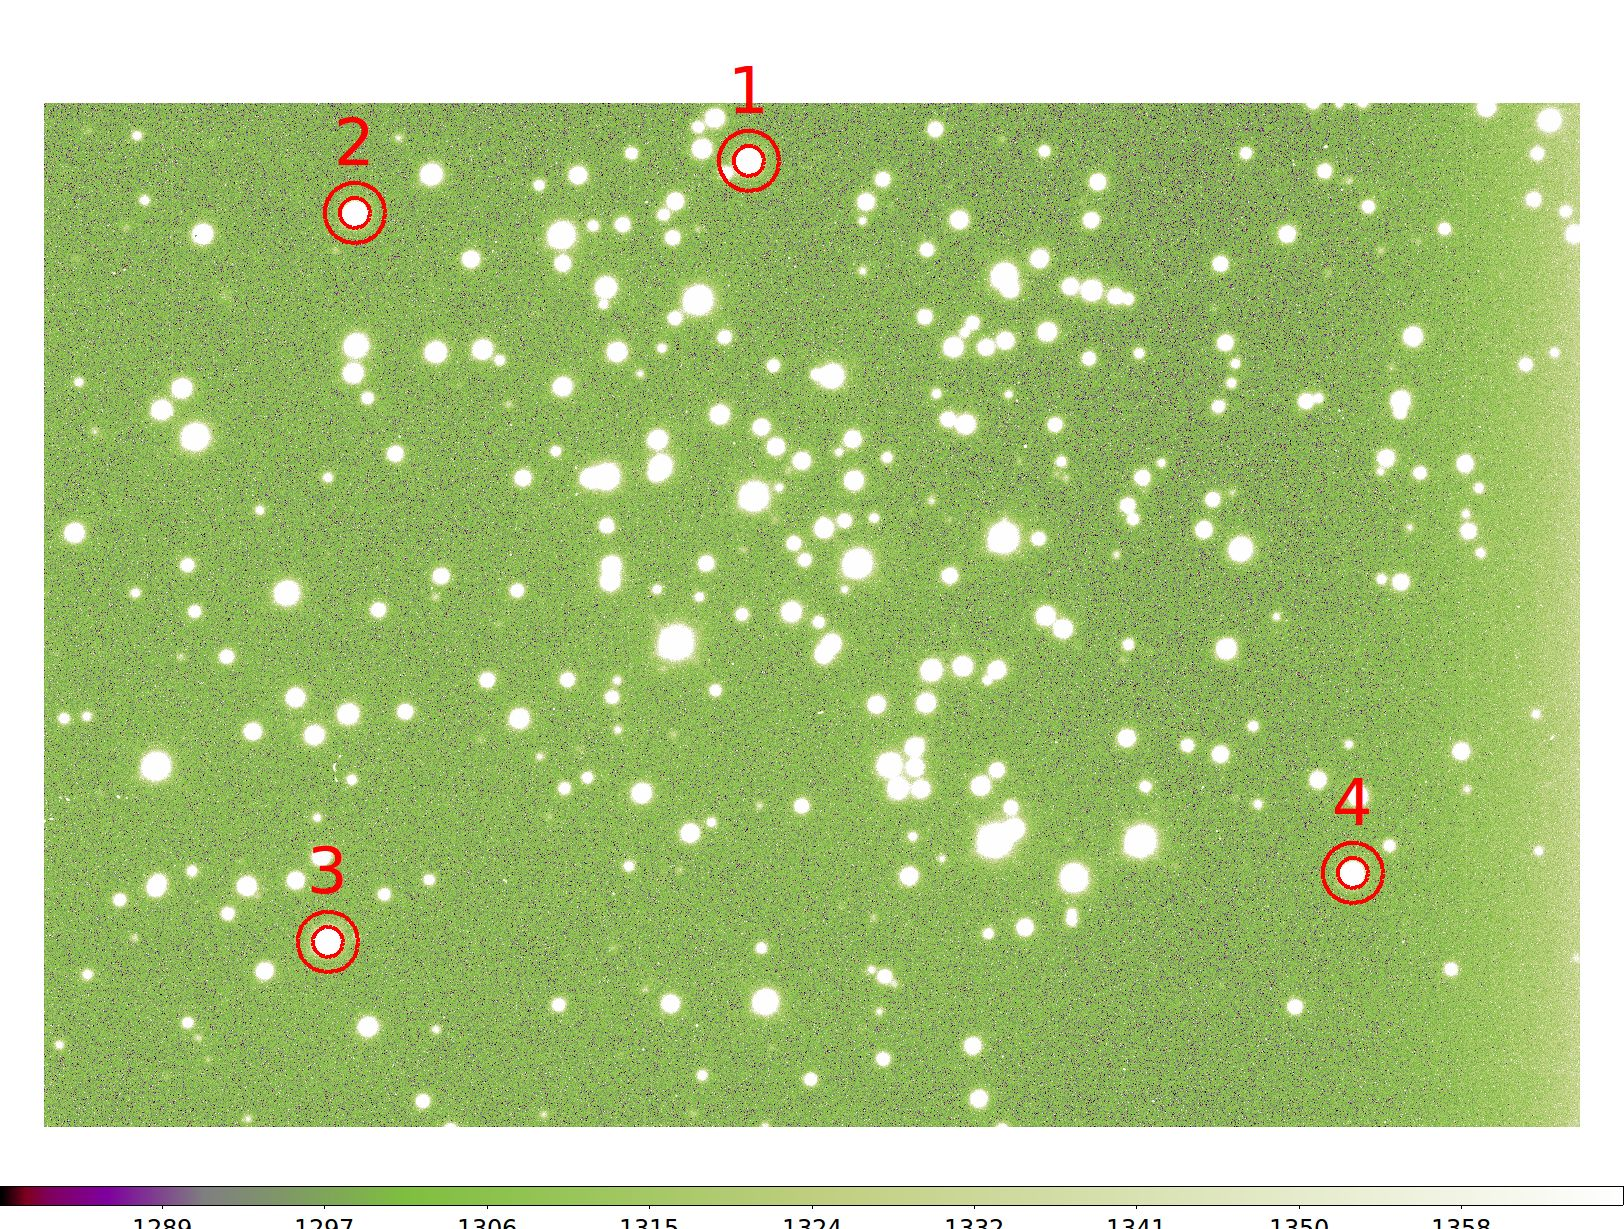

In [1]:
from IPython import display
display.Image("./M67_circled.jpeg")

This is an image of the Messier 67 [open cluster](https://en.wikipedia.org/wiki/Open_cluster). Take some time to google "Messier Catalog" and browse some of the beautiful images of these different objects. **What is your groups favourite object?**

*Your answer here*

Now open a browser and go to the [Aladin Lite](https://aladin.cds.unistra.fr/AladinLite/) online tool. This is a nice professional tool that contains a little more astronomical data than Stellarium. From it's website: "Aladin is an interactive sky atlas allowing the user to visualize digitized astronomical images or full surveys, superimpose entries from astronomical catalogues or databases...". The website provides a simple interface to access some of Aladin's most basic features. If you'd like to explore the tool more I recommend downloading the desktop version. 

**In the search bar enter the name of the cluster pictured above and zoom in. Underneath the search bar there is a selection of different Astronomical image Catalogs that you can display. Select 5 different catalogs and do some internet sleuthing to find out about them. For each catalog find out: At what telescope were these data taken? What is the wavelength of the data being displayed? When was the data taken (or published)?**



*Your answer here*

On the right-hand side of the screen you'll see the option to display data from several different catalogs. When you select one (it may take a second for the data to load), each star in the image that is in that database will show up with a symbol on it. If you click on that symbol you will be shown some of the main identifying information about that star. For the purposes of this lab using the SIMBAD catalog is probably most appropriate. 

**Identify the 4 numbered stars in the image above on the Aladin Lite site, and list their RA, $\delta$ values in the table below, 1 row per star. Also measure the $\{x,y\}$ coordinates
of each star on ```cluster.fits``` in DS9, using the cursor to pick out the brightest point in each star. Do this carefully, zooming so that setting the cursor is
easy, and adjusting the ''scale'' options so you can easily see the brightness variations inside the star images.  Make a subjective guess about the error (in pixel units) with which you can measure the star positions. Put this in the table too, under _error\_g_.**

Star| RA | $\delta$ | $x$ position | $y$ position | error_g
---|---|---|---|---|---
1 |---|---|---|---|--- 
2 |---|---|---|---|--- 
3 |---|---|---|---|--- 
4 |---|---|---|---|--- 

What do you think is your largest source of error (the one that dominates your estimate of
error\_g)?

*Your answer here*

Now compute the distances between various pairs of stars, as given below. Do this first by using the difference in RA and d that you obtained
from Aladin. Formally this is an exercise in spherical trigonometry, but because all of these stars are very close together on the sky, we
may use small-angle approximations. In this case we get sufficient accuracy by taking
$$
\Delta r = \sqrt{(\Delta \delta)^2 + \left(\Delta {\rm RA} \cos \delta \right)^2},
$$
where $\Delta r$ is the angular separation between two stars, $\Delta \delta$ is the separation in Declination, and $\Delta {\rm RA}$ is the separation in Right Ascension, with
all angles are expressed in units of angle (use arcsec). Remember that RA is normally expressed in units of time, not angle -- one second of
RA (the difference between RA = 08:30:00 and 08:30:01, for instance) equals 15 arcsec. You should think about where the factor $\cos(\delta)$ comes
from. Try computing the RA and Dec values as arcseconds first by hand, and then you can double check using astropy coordinates. 

In [ ]:
#Your code here

*Your answer here*

**Now compute the separation between these pairs of stars in units of pixels, using your measured values of $x$ position and $y$ position. In this case the
normal Pythagorean law may be used, with no $\cos(\delta)$ factor. (Think about why.) Use your estimates of error\_g and standard propagation-of-error
rules to estimate the errors in these separations which we will call error $_p$. In the space below, show the formula(s) you used for calculating the error $_p$ values. Then put all of the data into the table below. Expand the number of rows as necessary.**

Star Pair | $\Delta r$ (arcsec)| $\Delta p$ (pixel) | Error $_p$ (pixel)| Scale ($\frac{arcsec}{pixel}$) | Error $_{s}$ ($\frac{arcsec}{pixel}$)
---|---|---|---|---|---
(1,3) |---|---|---|---|--- 
(1,4) |---|---|---|---|--- 
(2,3) |---|---|---|---|--- 
(2,4) |---|---|---|---|--- 
(3,4) |---|---|---|---|--- 

**For each star pair, compute the image scale $\Delta r/\Delta p$ in units of arcsec/pixel, and enter this value in the table. Use Taylor’s error propagation rules, starting from your estimates of error $_p$, to estimate the error in your derived value for the image scale (which we will call error $_s$).
Assume that the star separations derived from Aladin positions have negligible errors. Put your error $_s$ values in the table.**


Now you have five not-quite-independent measurements of the image scale. Do they agree with each other, within the plausible errors?  If not (and especially if the disagreement is very large), the most likely explanations are (a) there is a mis-identified star, or (b) there is an error in computation. In either of these cases, you should go back and correct the error before proceeding.


**Average your results for image scale (we will do weighted averages later), and estimate the uncertainty of this mean value, again using the rules
described in Taylor’s book. From the image scale, compute the telescope focal length and its uncertainty. Compare this to the focal length
value found in the fits image header. Show your work.**

In [ ]:
#Your code here

*You answer here*

## Don't forget to restart your JupyterHub Kernel and re-run all of your cells before submitting! 